# Canonical importation

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Masking
from tensorflow.keras.models import Sequential

# Dataset exploration

In [55]:
!curl -L 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_cases.csv' > ../raw_data/confirmed_cases.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1997k  100 1997k    0     0  2019k      0 --:--:-- --:--:-- --:--:-- 2017k


In [56]:
df = pd.read_csv('../raw_data/confirmed_cases.csv')
df.head

<bound method NDFrame.head of      Unnamed: 0 country_code  country_name region_code region_name  \
0             1          ABW         Aruba         NaN         NaN   
1             2          AFG   Afghanistan         NaN         NaN   
2             3          AGO        Angola         NaN         NaN   
3             4          ALB       Albania         NaN         NaN   
4             5          AND       Andorra         NaN         NaN   
..          ...          ...           ...         ...         ...   
258         259          VUT       Vanuatu         NaN         NaN   
259         260          YEM         Yemen         NaN         NaN   
260         261          ZAF  South Africa         NaN         NaN   
261         262          ZMB        Zambia         NaN         NaN   
262         263          ZWE      Zimbabwe         NaN         NaN   

    jurisdiction  01Jan2020  02Jan2020  03Jan2020  04Jan2020  ...  30Aug2022  \
0      NAT_TOTAL        NaN        NaN        NaN

In [57]:
df.head(5)

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022,07Sep2022,08Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42914.0,42914.0,42914.0,42914.0
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,193004.0,193250.0,193520.0,193520.0,193912.0,194163.0,194355.0,194614.0,194614.0,194614.0
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,329017.0,329352.0,329615.0,329862.0,330062.0,330193.0,330221.0,330283.0,330283.0,330283.0
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0


In [58]:
df.head(203)

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022,07Sep2022,08Sep2022
0,1,ABW,Aruba,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42914.0,42914.0,42914.0,42914.0
1,2,AFG,Afghanistan,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,193004.0,193250.0,193520.0,193520.0,193912.0,194163.0,194355.0,194614.0,194614.0,194614.0
2,3,AGO,Angola,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
3,4,ALB,Albania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,329017.0,329352.0,329615.0,329862.0,330062.0,330193.0,330221.0,330283.0,330283.0,330283.0
4,5,AND,Andorra,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,TZA,Tanzania,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,38712.0,38712.0,38712.0,38712.0,38712.0,38712.0,38951.0,38951.0,38951.0,38951.0
199,200,UGA,Uganda,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,169396.0,169396.0,169396.0,169396.0,169396.0,169396.0,169396.0,169396.0,169396.0,169396.0
200,201,UKR,Ukraine,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,5328726.0,5329263.0,5341445.0,5342118.0,5342895.0,5343674.0,5344324.0,5360956.0,5360956.0,5360956.0
201,202,URY,Uruguay,NaN,NaN,NAT_TOTAL,NaN,NaN,NaN,NaN,...,979160.0,979160.0,979160.0,979160.0,979160.0,979160.0,981186.0,981186.0,981186.0,981186.0


In [59]:
df.describe()

,Unnamed: 0,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,...,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022,07Sep2022,08Sep2022
count,263.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02,2.620000e+02
mean,132.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.989462e+06,2.993110e+06,2.996109e+06,2.998988e+06,3.000475e+06,3.001928e+06,3.003804e+06,3.006962e+06,2.679015e+06,2.679015e+06
std,76.065761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.231248e+06,8.242808e+06,8.251325e+06,8.258942e+06,8.261711e+06,8.264140e+06,8.268449e+06,8.277496e+06,8.296134e+06,8.296134e+06
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02,7.930000e+02
25%,66.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.817425e+04,6.819025e+04,6.820825e+04,6.822025e+04,6.822025e+04,6.822025e+04,6.822025e+04,6.825925e+04,6.825925e+04,6.825925e+04
50%,132.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.897380e+05,5.902520e+05,5.908065e+05,5.913045e+05,5.913045e+05,5.913045e+05,5.913045e+05,5.929850e+05,1.752900e+05,1.752900e+05
75%,197.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.976789e+06,1.977887e+06,1.983071e+06,1.984170e+06,1.984286e+06,1.984459e+06,1.984709e+06,1.984944e+06,1.137000e+06,1.137000e+06
max,263.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.437910e+07,9.453292e+07,9.465110e+07,9.473388e+07,9.474367e+07,9.474978e+07,9.476982e+07,9.489886e+07,9.489886e+07,9.489886e+07


In [60]:
df.columns

Index(['Unnamed: 0', 'country_code', 'country_name', 'region_code',
       'region_name', 'jurisdiction', '01Jan2020', '02Jan2020', '03Jan2020',
       '04Jan2020',
       ...
       '30Aug2022', '31Aug2022', '01Sep2022', '02Sep2022', '03Sep2022',
       '04Sep2022', '05Sep2022', '06Sep2022', '07Sep2022', '08Sep2022'],
      dtype='object', length=988)

In [61]:
df.shape

(263, 988)

In [62]:
df.isna()

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022,07Sep2022,08Sep2022
0,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
259,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
260,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
261,False,False,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [64]:
usa_df = df.loc[df['country_code'] == 'usa'].copy()
usa_df

,Unnamed: 0,country_code,country_name,region_code,region_name,jurisdiction,01Jan2020,02Jan2020,03Jan2020,04Jan2020,...,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022,07Sep2022,08Sep2022


In [65]:
df.loc[202]

Unnamed: 0                203
country_code              USA
country_name    United States
region_code               NaN
region_name               NaN
                    ...      
04Sep2022          94749783.0
05Sep2022          94769820.0
06Sep2022          94898863.0
07Sep2022          94898863.0
08Sep2022          94898863.0
Name: 202, Length: 988, dtype: object

# Time series

In [66]:
ts_cases = df.drop(columns=['country_name','region_code','region_name','jurisdiction','Unnamed: 0'])

In [68]:
ts_cases = ts_cases.groupby('country_code').agg('sum')
ts_cases.transpose()
ts_cases.columns.name = 'Dates'
ts_cases = ts_cases.fillna(0)

In [69]:
ts_cases

Dates,01Jan2020,02Jan2020,03Jan2020,04Jan2020,05Jan2020,06Jan2020,07Jan2020,08Jan2020,09Jan2020,10Jan2020,...,30Aug2022,31Aug2022,01Sep2022,02Sep2022,03Sep2022,04Sep2022,05Sep2022,06Sep2022,07Sep2022,08Sep2022
country_code,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42792.0,42848.0,42848.0,42848.0,42848.0,42848.0,42914.0,42914.0,42914.0,42914.0
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,193004.0,193250.0,193520.0,193520.0,193912.0,194163.0,194355.0,194614.0,194614.0,194614.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0,102636.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,329017.0,329352.0,329615.0,329862.0,330062.0,330193.0,330221.0,330283.0,330283.0,330283.0
AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0,46027.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11793.0,11815.0,11825.0,11836.0,11836.0,11836.0,11864.0,11892.0,11892.0,11892.0
YEM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11926.0,11926.0,11926.0,11926.0,11926.0,11931.0,11931.0,11931.0,11931.0,11931.0
ZAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4011657.0,4011937.0,4012239.0,4012485.0,4012653.0,4012812.0,4012920.0,4012920.0,4012920.0,4012920.0


In [70]:
ts_cases = ts_cases.transpose()


In [71]:
ts_cases

country_code,ABW,AFG,AGO,ALB,AND,ARE,ARG,AUS,AUT,AZE,...,USA,UZB,VEN,VIR,VNM,VUT,YEM,ZAF,ZMB,ZWE
Dates,,,,,,,,,,,,,,,,,,,,,
01Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
04Sep2022,42848.0,194163.0,102636.0,330193.0,46027.0,1017145.0,9689861.0,20145774.0,4966009.0,815523.0,...,188464761.0,243830.0,542874.0,22771.0,11418894.0,11836.0,11931.0,4012812.0,333074.0,256763.0
05Sep2022,42914.0,194355.0,102636.0,330221.0,46027.0,1017543.0,9689861.0,20166402.0,4977837.0,815523.0,...,188503831.0,243863.0,542952.0,22771.0,11421055.0,11864.0,11931.0,4012920.0,333086.0,256769.0
06Sep2022,42914.0,194614.0,102636.0,330283.0,46027.0,1017954.0,9689861.0,20190000.0,4980628.0,816087.0,...,188761844.0,243879.0,543123.0,22844.0,11424754.0,11892.0,11931.0,4012920.0,333124.0,256782.0


In [35]:
ts_cases.shape

(982, 187)

In [74]:
ts_cases_usa = ts_cases['USA']
ts_cases_usa

Dates
01Jan2020            0.0
02Jan2020            0.0
03Jan2020            0.0
04Jan2020            0.0
05Jan2020            0.0
                ...     
04Sep2022    188464761.0
05Sep2022    188503831.0
06Sep2022    188761844.0
07Sep2022    103838653.0
08Sep2022    103838653.0
Name: USA, Length: 982, dtype: float64

In [12]:

# for col in df.columns:
#     color="orange" if col == "" else "blue"
#     df[col].plot(figsize=(17, 2), color=color)
#     plt.title(col)
#     plt.show()

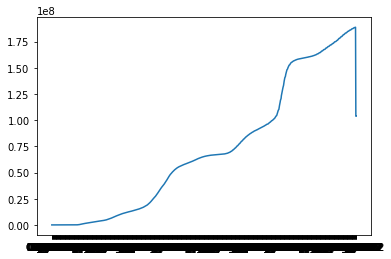

In [75]:
plt.plot(ts_cases_usa,label='confirmed cases')

# Preprocessing

In [76]:
# Time Series split
len_ = int(0.8*ts_cases_usa.shape[0])
ts_cases_usa_train = ts_cases_usa[:len_]
ts_cases_usa_test = ts_cases_usa[len_:]

In [81]:
# Scale with MinMaxScaler
columns = df.columns

scaler = MinMaxScaler()
df_train = pd.DataFrame(scaler.fit_transform(df_train), columns=columns)
df_test = pd.DataFrame(scaler.transform(df_test), columns=columns)
df_train.head()

ValueError: could not convert string to float: 'ABW'

In [14]:
X_train, y_train = get_X_y(df_train, , )
X_test, y_test = get_X_y(df_test, , )

SyntaxError: invalid syntax (362142446.py, line 1)

In [ ]:
assert X_train.shape == (, , )

## Create sequences

In [ ]:


def subsample_sequence(df_usa, length):
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length`.
    This shorter sequence should be selected at random.
    """
    
    last_possible = df_usa.shape[0] - length
    
    random_start = np.random.randint(0, last_possible)
    df_usa_sample = df[random_start: random_start+length]
    
    return df_usa_sample

def compute_means(X, usa_df_mean):
    '''utils'''
    # Compute means of X
    means = X.mean()
    
    # Case if ALL values of at least one feature of X are NaN, then reaplace with the whole df_mean
    if means.isna().sum() != 0:
        means.fillna(df_mean, inplace=True)
        
    return means

def split_subsample_sequence(df, length, df_mean=None):
    """Return one single sample (Xi, yi) containing one sequence each of length `length`"""
    features_names = ['TEMP', 'DEWP', 'PRES', 'Ir', 'Is', 'Iws']
    
    # Trick to save time during the recursive calls
    if df_mean is None:
        df_mean = df[features_names].mean()
        
    df_subsample = subsample_sequence(df, length).copy()
    
    # Let's drop any row without a target! We need targets to fit our model
    df_subsample.dropna(how='any', subset=['pm2.5'], inplace=True)
    
    # Create y_sample
    if df_subsample.shape[0] == 0: # Case if there is no targets at all remaining
        return split_subsample_sequence(df, length, df_mean) # Redraw by recursive call until it's not the case anymore
    y_sample = df_subsample[['pm2.5']]
    
    # Create X_sample
    X_sample = df_subsample[features_names]
    if X_sample.isna().sum().sum() !=0:  # Case X_sample has some NaNs
        X_sample = X_sample.fillna(compute_means(X_sample, df_mean))
        
    return np.array(X_sample), np.array(y_sample)

def get_X_y(df, sequence_lengths):
    '''Return a dataset (X, y)'''
    X, y = [], []

    for length in sequence_lengths:
        xi, yi = split_subsample_sequence(df, length)
        X.append(xi)
        y.append(yi)
        
    return X, y

In [ ]:
# Here we define the parameter to generate our train/test sets
train_size = 1000
test_size = round(0.2 * train_size)

min_seq_len = 15
max_seq_len = 30

In [ ]:
# Let's generate some train/test sets
sequence_lengths_train = np.random.randint(low=min_seq_len, high=max_seq_len, size=train_size)
X_train, y_train = get_X_y(df_train, sequence_lengths_train)

sequence_lengths_test = np.random.randint(low=min_seq_len, high=max_seq_len, size=test_size)
X_test, y_test = get_X_y(df_test, sequence_lengths_test)

# Padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train, value=-1000., dtype=float, padding='post', maxlen=30)
y_train_pad = pad_sequences(y_train, value=-1000., dtype=float, padding='post', maxlen=30)

X_test_pad = pad_sequences(X_test, value=-1000., dtype=float, padding='post', maxlen=30)
y_test_pad = pad_sequences(y_test, value=-1000., dtype=float, padding='post', maxlen=30)

X_train_pad.shape

In [ ]:
# Give validation set explicitly
history = model.fit(X_train_pad, y_train_pad,
          validation_data=(X_val, y_val), 
          batch_size=16,
          epochs=100)

# Initial model RNN

In [ ]:
def init_model():
    
    model = models.Sequential()
    model.add(layers.Masking(mask_value=-1000., input_shape=(30,6)))
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, return_sequences=True, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='mse', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])
    model.compile(loss='mape', 
                  optimizer=RMSprop(learning_rate=0.0003), 
                  metrics=['mape'])
    
    
    return model

init_model().summary()

In [ ]:
# Evaluate performance returns [loss, metrics]
model.evaluate(scaler.transform(X_test), y_test)

In [ ]:
# First prediction
init_model.predict(scaler.transform(X_test))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = init_model()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

history = model.fit(X_train_pad, y_train_pad,
            validation_set=0.1,
            epochs=1000, 
            batch_size=64,
            callbacks=[es], verbose=0)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acuracy'])

In [ ]:
res = model.evaluate(X_test_pad, y_test_pad, verbose=0)

print(f'MAE on the test set : {res[1]:.4f}, or {res[1]/bench_res:.2f} times the benchmark')

# Compile

In [ ]:
plt.figure(figsize=(17,3))
for id_plot, id_seq in enumerate(np.random.randint(low=0,high=len(X_test),size=5)):
    plt.subplot(1, 5, id_plot+1)
    plt.plot(y_test[id_seq], label='truth')
    plt.plot(model.predict(X_test_pad)[id_seq], label='pred')
    plt.ylim(ymin=0)
plt.legend();

# Simple LSTM RNN

In [ ]:
def init_model():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.01)
    
    normalizer = Normalization()
    normalizer.adapt(X_train)

    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

# GRU layers 

In [ ]:
def init_model_2():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.005)
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.GRU(20, return_sequences=True, activation='tanh'))
    model.add(layers.GRU(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics='mape')
    
    return model

model_2 = init_model_2()

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)

history_2 = model_2.fit(X_train, y_train,
            validation_set=0.1,
            epochs=1000, 
            batch_size=32,
            callbacks=[es], verbose=0)

# Stack layers RNN

In [ ]:
def init_model_2():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.005)
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.GRU(20, return_sequences=True, activation='tanh'))
    model.add(layers.GRU(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

model_2 = init_model_2()

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)

history_2 = model_2.fit(X_train, y_train,
            validation_set=0.1,
            epochs=1000, 
            batch_size=32,
            callbacks=[es], verbose=0)